![Add a relevant banner image here](path_to_image)

# Project Title

## Overview

You've been hired as a data analyst for the Department of Transportation (DOT). The department is concerned about the number of traffic accidents across the United States and wants to develop strategies to reduce accidents and improve road safety. 

 Analyze the US Accidents dataset to identify patterns, trends, and factors contributing to accidents. Based on your comprehensive analysis, you'll provide three data-driven insights that the DOT could utilize to reduce traffic accidents and improve road safety.

For the Department of Transportation (DOT), understanding and reducing traffic accidents is a critical mission that directly impacts public safety, economic costs, and quality of life across the United States.

Here's why this analysis matters from a stakeholder and business perspective:

Economic Impact: Traffic accidents cost billions annually in medical expenses, property damage, and lost productivity, making even small reductions highly valuable.

Public Safety: As a leading cause of injury and death, reducing traffic accidents directly fulfills DOT's core mandate to protect citizens.

Infrastructure Prioritization: Data analysis enables strategic allocation of limited infrastructure improvement budgets to highest-risk areas.

Policy Development: Accident data informs new safety regulations and provides metrics to evaluate existing programs' effectiveness.
Stakeholder Accountability: Comprehensive analysis demonstrates evidence-based decision-making to Congress, local governments, and the public.

Cross-Agency Collaboration: Shared data insights can align accident reduction efforts across DOT, law enforcement, and emergency services.

Technology Integration: Understanding accident patterns guides how emerging vehicle technologies should be regulated to maximize safety benefits.

## Business Understanding

My understanding after reading all this that I need to do this cleaning and present my fidings to the stakeholders. Not just for the business side of things but to improve and understand causes of the accidents in DOT. 

## Data Understanding

Well notice that Data is too big and my computer takes around 7 min to process. After councelling my Teacher Im going to aproach the Pyspark to seeif it works.

1st step import (think about all the import that you have done in the class) 

2. load the data and check the data

In [2]:
# Load relevant imports here
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy
import scipy.stats as stats
import scipy.optimize as optimize
import statsmodels.api as sm
import statsmodels.formula.api as smf
from pyspark.sql import SparkSession
from pyspark.sql.functions import *
import pyspark.sql.types as types


In [3]:
# Check dataset size first
import os
file_path = 'US_Accidents_March23.csv'  # Replace with actual path
if os.path.exists(file_path):
    size_mb = os.path.getsize(file_path) / (1024**2)
    print(f"Dataset size: {size_mb:.1f} MB")
else:
    print("Please update the file path")


Dataset size: 2916.5 MB


NOTE:These File is way too big for my computer. Need to find an Alternative answer. I try to use aws and google but I dont understand it really well so Im going to continue in what I understand

In [4]:
# Load 10% sample for fast exploration
df = pd.read_csv('US_Accidents_March23.csv', 
                 skiprows=lambda i: i > 0 and np.random.random() > 0.1)
print(f"Sample loaded: {df.shape}")
print(f"Memory: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Sample loaded: (773863, 46)
Memory: 970.8 MB


In [5]:
# Quick overview
print("Columns:", len(df.columns))
print("\nFirst few columns:")
print(df.columns.tolist()[:15])
print("\nData types:")
print(df.dtypes.value_counts())



Columns: 46

First few columns:
['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State']

Data types:
object     20
bool       13
float64    12
int64       1
Name: count, dtype: int64


In [6]:
# See what data you have
print(df.head(3))
print("\nMissing values (top 10):")
print((df.isnull().sum() / len(df) * 100).sort_values(ascending=False).head(10))


     ID   Source  Severity           Start_Time             End_Time  \
0  A-15  Source2         2  2016-02-08 08:39:43  2016-02-08 09:09:43   
1  A-20  Source2         2  2016-02-08 09:35:35  2016-02-08 10:05:35   
2  A-42  Source2         2  2016-02-09 05:47:16  2016-02-09 06:17:16   

   Start_Lat  Start_Lng  End_Lat  End_Lng  Distance(mi)  ... Roundabout  \
0  39.972038 -82.913521      NaN      NaN          0.01  ...      False   
1  39.790703 -84.244461      NaN      NaN          0.01  ...      False   
2  39.787731 -84.173439      NaN      NaN          0.01  ...      False   

  Station   Stop Traffic_Calming Traffic_Signal Turning_Loop Sunrise_Sunset  \
0   False  False           False           True        False            Day   
1   False  False           False          False        False            Day   
2   False  False           False           True        False          Night   

  Civil_Twilight Nautical_Twilight Astronomical_Twilight  
0            Day               Day

Need to find out how many columns do I have to decide with one is more important

In [7]:

df_sample = pd.read_csv('US_Accidents_March23.csv', nrows=1)
print("Available columns:")
print(df_sample.columns.tolist())


Available columns:
['ID', 'Source', 'Severity', 'Start_Time', 'End_Time', 'Start_Lat', 'Start_Lng', 'End_Lat', 'End_Lng', 'Distance(mi)', 'Description', 'Street', 'City', 'County', 'State', 'Zipcode', 'Country', 'Timezone', 'Airport_Code', 'Weather_Timestamp', 'Temperature(F)', 'Wind_Chill(F)', 'Humidity(%)', 'Pressure(in)', 'Visibility(mi)', 'Wind_Direction', 'Wind_Speed(mph)', 'Precipitation(in)', 'Weather_Condition', 'Amenity', 'Bump', 'Crossing', 'Give_Way', 'Junction', 'No_Exit', 'Railway', 'Roundabout', 'Station', 'Stop', 'Traffic_Calming', 'Traffic_Signal', 'Turning_Loop', 'Sunrise_Sunset', 'Civil_Twilight', 'Nautical_Twilight', 'Astronomical_Twilight']


In [8]:
# Based on typical US Accidents dataset
usecols = ['Start_Time', 'Severity', 'State', 'City', 'Weather_Condition', 
           'Temperature(F)', 'Visibility(mi)', 'Street']

df_full = pd.read_csv('US_Accidents_March23.csv', 
                      usecols=usecols,
                      parse_dates=['Start_Time'])
print(f"Dataset loaded: {df_full.shape}")
print(f"Memory: {df_full.memory_usage(deep=True).sum()/1024**2:.1f} MB")


Dataset loaded: (7728394, 8)
Memory: 2342.7 MB


I notice that AI suggested to have Memory usage print and everytime that the usage is High is when it takes way more time to process everything... Im going to leave it for future reference when I get a new PC.

I think We these columns are essential/ help me for this project

In [9]:

key_columns = ['Start_Time', 'Severity', 'State', 'City', 'County', 
               'Weather_Condition', 'Temperature(F)', 'Visibility(mi)', 
               'Traffic_Signal', 'Junction', 'Sunrise_Sunset', 'Street']

df = pd.read_csv('US_Accidents_March23.csv', 
                 usecols=key_columns,
                 parse_dates=['Start_Time'])
print(f"Dataset loaded: {df.shape}")
print(f"Memory usage: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")

Dataset loaded: (7728394, 12)
Memory usage: 3165.4 MB


3165.4 MB takes 50 s to finish

In [10]:
# Quick exploration
print("Date range:", df['Start_Time'].min(), "to", df['Start_Time'].max())
print("\nSeverity distribution:")
print(df['Severity'].value_counts().sort_index())
print("\nTop 10 states by accident count:")
print(df['State'].value_counts().head(10))


Date range: 2016-01-14 20:18:33 to 2023-03-31 23:30:00

Severity distribution:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64

Top 10 states by accident count:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


In [11]:
# Missing values analysis
print("Missing values:")
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(1)
missing_df = pd.DataFrame({'Count': missing, 'Percentage': missing_pct})
print(missing_df[missing_df['Count'] > 0].sort_values('Percentage', ascending=False))


Missing values:
                    Count  Percentage
Visibility(mi)     177098         2.3
Weather_Condition  173459         2.2
Temperature(F)     163853         2.1
Sunrise_Sunset      23246         0.3
Street              10869         0.1
City                  253         0.0


In [12]:
# Re-load with proper date parsing
key_columns = ['Start_Time', 'Severity', 'State', 'City', 'County', 
               'Weather_Condition', 'Temperature(F)', 'Visibility(mi)', 
               'Traffic_Signal', 'Junction', 'Sunrise_Sunset', 'Street']

df = pd.read_csv('US_Accidents_March23.csv', 
                 usecols=key_columns,
                 parse_dates=['Start_Time'],
                 date_parser=pd.to_datetime)
print(f"Dataset reloaded with proper datetime: {df.shape}")



C:\Users\lorte\AppData\Local\Temp\ipykernel_16476\4091303971.py:6: FutureWarning: The argument 'date_parser' is deprecated and will be removed in a future version. Please use 'date_format' instead, or read your data in as 'object' dtype and then call 'to_datetime'.
  df = pd.read_csv('US_Accidents_March23.csv',


Dataset reloaded with proper datetime: (7728394, 12)


In [13]:
# Dataset overview
print(f"Total accidents: {len(df):,}")
print(f"Memory usage: {df.memory_usage(deep=True).sum()/1024**2:.1f} MB")
print(f"\nDate range: {df['Start_Time'].min()} to {df['Start_Time'].max()}")
print(f"\nColumns: {df.columns.tolist()}")


Total accidents: 7,728,394
Memory usage: 2716.3 MB

Date range: 2016-01-14 20:18:33 to 2023-03-31 23:30:00

Columns: ['Severity', 'Start_Time', 'Street', 'City', 'County', 'State', 'Temperature(F)', 'Visibility(mi)', 'Weather_Condition', 'Junction', 'Traffic_Signal', 'Sunrise_Sunset']


In [14]:
# Severity analysis
print("Severity Distribution:")
print(df['Severity'].value_counts().sort_index())

print("\n\nTop 10 States by Accident Count:")
print(df['State'].value_counts().head(10))

print("\n\nTop 10 Cities by Accident Count:")
print(df['City'].value_counts().head(10))


Severity Distribution:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


Top 10 States by Accident Count:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


Top 10 Cities by Accident Count:
City
Miami          186917
Houston        169609
Los Angeles    156491
Charlotte      138652
Dallas         130939
Orlando        109733
Austin          97359
Raleigh         86079
Nashville       72930
Baton Rouge     71588
Name: count, dtype: int64


In [15]:
# Checking for data quality
missing = df.isnull().sum()
missing_pct = (missing / len(df) * 100).round(2)
missing_summary = pd.DataFrame({
    'Missing_Count': missing,
    'Missing_Percent': missing_pct
}).sort_values('Missing_Percent', ascending=False)

print("Missing Values Summary:")
print(missing_summary[missing_summary['Missing_Count'] > 0])


Missing Values Summary:
                   Missing_Count  Missing_Percent
Visibility(mi)            177098             2.29
Weather_Condition         173459             2.24
Temperature(F)            163853             2.12
Sunrise_Sunset             23246             0.30
Street                     10869             0.14
City                         253             0.00


In [16]:
# Extracting time-based features for analysis
df['Hour'] = df['Start_Time'].dt.hour
df['DayOfWeek'] = df['Start_Time'].dt.day_name()
df['Month'] = df['Start_Time'].dt.month
df['Year'] = df['Start_Time'].dt.year

print("Time features created successfully!")
print(f"\nYears covered: {df['Year'].min()} to {df['Year'].max()}")
print(f"\nSample with time features:")
print(df[['Start_Time', 'Hour', 'DayOfWeek', 'Severity', 'State', 'City']].head())


Time features created successfully!

Years covered: 2016 to 2023

Sample with time features:
           Start_Time  Hour DayOfWeek  Severity State          City
0 2016-02-08 05:46:00     5    Monday         3    OH        Dayton
1 2016-02-08 06:07:59     6    Monday         2    OH  Reynoldsburg
2 2016-02-08 06:49:27     6    Monday         2    OH  Williamsburg
3 2016-02-08 07:23:34     7    Monday         3    OH        Dayton
4 2016-02-08 07:39:07     7    Monday         2    OH        Dayton


In [17]:

print("Weather & Environmental Conditions Summary:")
print(df[['Temperature(F)', 'Visibility(mi)']].describe())

print("\n\nAccidents by Time of Day:")
print(df['Sunrise_Sunset'].value_counts())



Weather & Environmental Conditions Summary:
       Temperature(F)  Visibility(mi)
count    7.564541e+06    7.551296e+06
mean     6.166329e+01    9.090376e+00
std      1.901365e+01    2.688316e+00
min     -8.900000e+01    0.000000e+00
25%      4.900000e+01    1.000000e+01
50%      6.400000e+01    1.000000e+01
75%      7.600000e+01    1.000000e+01
max      2.070000e+02    1.400000e+02


Accidents by Time of Day:
Sunrise_Sunset
Day      5334553
Night    2370595
Name: count, dtype: int64


So for What I can Understand with this Data is that there is a Total of 7,728,394 Accidents that range between 2016 to 2023. Theres a range of severity that is 1 to 4. Top 10 States with the most Accidents are CA,FL,TX,SC,NY,NC,VA,PA,MN,OR. We got some vissiing valueson visibility, weather conditions, tempeture, sunrise_sunset, street and city. Acciddents happens more during the day leading by 5,334,553.

## Data Preparation


Missing values

In [18]:
# Checking for missing values in key columns
print("Missing values before cleaning:")
print(df[['Weather_Condition', 'Temperature(F)', 'Visibility(mi)']].isnull().sum())

# Dropping rows with missing critical values
df_clean = df.dropna(subset=['Severity', 'State', 'Start_Time'])

# Fill missing weather data
df_clean['Weather_Condition'].fillna('Unknown', inplace=True)
df_clean['Temperature(F)'].fillna(df_clean['Temperature(F)'].median(), inplace=True)
df_clean['Visibility(mi)'].fillna(df_clean['Visibility(mi)'].median(), inplace=True)

print(f"\nRecords after cleaning: {len(df_clean):,}")


Missing values before cleaning:
Weather_Condition    173459
Temperature(F)       163853
Visibility(mi)       177098
dtype: int64


C:\Users\lorte\AppData\Local\Temp\ipykernel_16476\3747384758.py:9: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Weather_Condition'].fillna('Unknown', inplace=True)
C:\Users\lorte\AppData\Local\Temp\ipykernel_16476\3747384758.py:10: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a 


Records after cleaning: 7,728,394


C:\Users\lorte\AppData\Local\Temp\ipykernel_16476\3747384758.py:11: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df_clean['Visibility(mi)'].fillna(df_clean['Visibility(mi)'].median(), inplace=True)


In [19]:
print("Accidents by year:")
print(df_clean['Year'].value_counts().sort_index())

# Keep all years for now -Even though AI suggested filtering
print(f"\nTotal records: {len(df_clean):,}")
print(f"Year range: {df_clean['Year'].min()} to {df_clean['Year'].max()}")



Accidents by year:
Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
2023     246633
Name: count, dtype: int64

Total records: 7,728,394
Year range: 2016 to 2023


In [20]:
# Time of day categories
def categorize_hour(hour):
    if 6 <= hour < 12:
        return 'Morning'
    elif 12 <= hour < 17:
        return 'Afternoon'
    elif 17 <= hour < 21:
        return 'Evening'
    else:
        return 'Night'

df_clean['Time_of_Day'] = df_clean['Hour'].apply(categorize_hour)

# Severity categories
df_clean['Severity_Category'] = df_clean['Severity'].map({
    1: 'Low', 2: 'Medium', 3: 'High', 4: 'Very High'
})

print("New features created:")
print(df_clean[['Hour', 'Time_of_Day', 'Severity', 'Severity_Category']].head())


New features created:
   Hour Time_of_Day  Severity Severity_Category
0     5       Night         3              High
1     6     Morning         2            Medium
2     6     Morning         2            Medium
3     7     Morning         3              High
4     7     Morning         2            Medium


In [21]:
# Simplify weather conditions
def categorize_weather(condition):
    if pd.isna(condition) or condition == 'Unknown':
        return 'Unknown'
    condition = str(condition).lower()
    if 'clear' in condition or 'fair' in condition:
        return 'Clear'
    elif 'rain' in condition or 'drizzle' in condition:
        return 'Rain'
    elif 'snow' in condition or 'ice' in condition:
        return 'Snow/Ice'
    elif 'fog' in condition or 'mist' in condition:
        return 'Fog'
    elif 'cloud' in condition:
        return 'Cloudy'
    else:
        return 'Other'

df_clean['Weather_Category'] = df_clean['Weather_Condition'].apply(categorize_weather)
print("Weather categories:")
print(df_clean['Weather_Category'].value_counts())


Weather categories:
Weather_Category
Clear       3405216
Cloudy      2780884
Other        556996
Rain         538878
Unknown      173459
Snow/Ice     161154
Fog          111807
Name: count, dtype: int64


In [22]:
# final columns for analysis
analysis_cols = ['Start_Time', 'Year', 'Month', 'Hour', 'DayOfWeek', 'Time_of_Day',
                 'Severity', 'Severity_Category', 'State', 'City', 'County',
                 'Weather_Category', 'Temperature(F)', 'Visibility(mi)',
                 'Traffic_Signal', 'Junction', 'Sunrise_Sunset']

df_final = df_clean[analysis_cols].copy()

print(f"Final dataset shape: {df_final.shape}")
print(f"Memory usage: {df_final.memory_usage(deep=True).sum()/1024**2:.1f} MB")
print("\nDataset ready for analysis!")
print(df_final.head())


Final dataset shape: (7728394, 17)
Memory usage: 3581.6 MB

Dataset ready for analysis!
           Start_Time  Year  Month  Hour DayOfWeek Time_of_Day  Severity  \
0 2016-02-08 05:46:00  2016      2     5    Monday       Night         3   
1 2016-02-08 06:07:59  2016      2     6    Monday     Morning         2   
2 2016-02-08 06:49:27  2016      2     6    Monday     Morning         2   
3 2016-02-08 07:23:34  2016      2     7    Monday     Morning         3   
4 2016-02-08 07:39:07  2016      2     7    Monday     Morning         2   

  Severity_Category State          City      County Weather_Category  \
0              High    OH        Dayton  Montgomery             Rain   
1            Medium    OH  Reynoldsburg    Franklin             Rain   
2            Medium    OH  Williamsburg    Clermont            Other   
3              High    OH        Dayton  Montgomery           Cloudy   
4            Medium    OH        Dayton  Montgomery           Cloudy   

   Temperature(F)  Vis

In [23]:
# Save for future use
df_final.to_csv('accidents_cleaned.csv', index=False)
print("Cleaned dataset saved!")


Cleaned dataset saved!


Data has been prepare and clean. Finidings year with the most accidents was 2022 with 1,762,452 with 2021 was on second place with 2021 with 1,563,753, and 3rd 2020 1,178,913.Wich caught me thinking that does accident happend when Covid started to hit in the US in 2020 wich maybe have cause an impact on people driving sick or recklessly. With the most accidents happening on clear weather 3,405,21 (wich I was suprise). Second place cloudy with 2,780,884. Notice that my AI suggessted to do a sample at first and only doing years from 2019 to 2023 wich I do get it but I didnt want to delete every data before that we can use for the analyses even if my computer cant handle it.

## Analysis


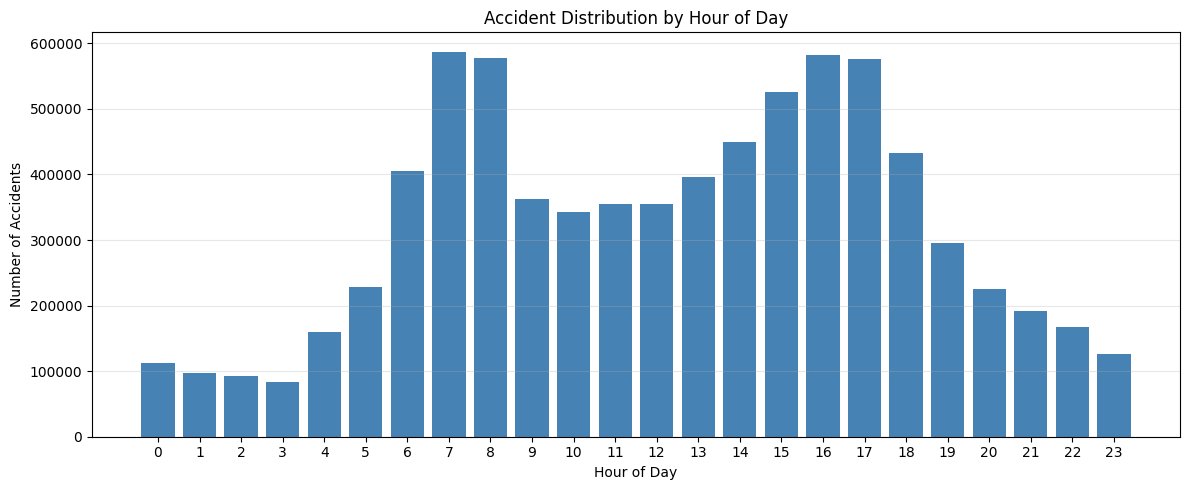

Peak accident hours:
Hour
7     587472
16    581969
8     577576
17    576015
15    525855
dtype: int64


In [24]:
# Analyze accidents by hour of day
plt.figure(figsize=(12, 5))
hourly = df_clean.groupby('Hour').size()
plt.bar(hourly.index, hourly.values, color='steelblue')
plt.xlabel('Hour of Day')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Hour of Day')
plt.xticks(range(0, 24))
plt.grid(axis='y', alpha=0.3)
plt.tight_layout()
plt.show()

print("Peak accident hours:")
print(hourly.sort_values(ascending=False).head(5))


Accidents happen more during rush hour times. Either where people are leaving to home to go to work or leaving work to their homes.

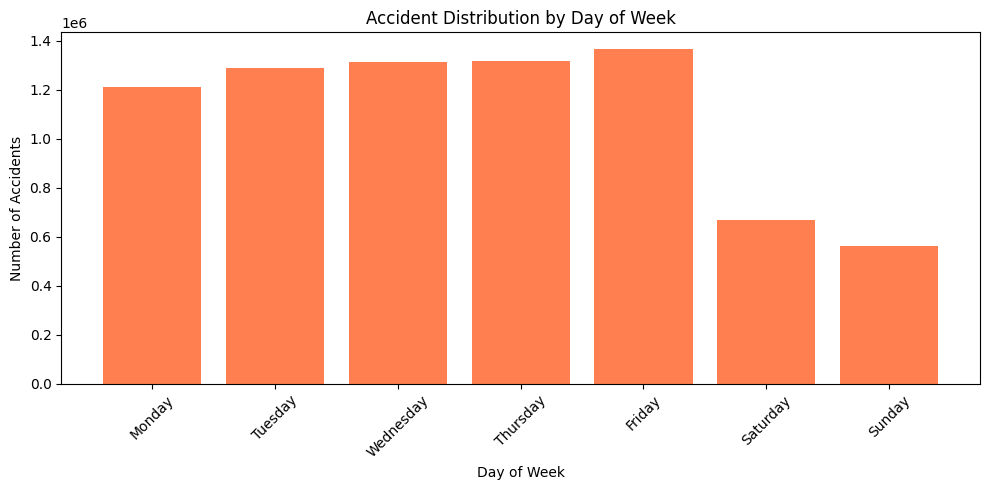

In [25]:
# Accidents by day of week
day_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
day_counts = df_clean['DayOfWeek'].value_counts().reindex(day_order)

plt.figure(figsize=(10, 5))
plt.bar(day_order, day_counts.values, color='coral')
plt.xlabel('Day of Week')
plt.ylabel('Number of Accidents')
plt.title('Accident Distribution by Day of Week')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()



Week days with the most accident. Probably from the stress of work and exhaustion maybe a factor.

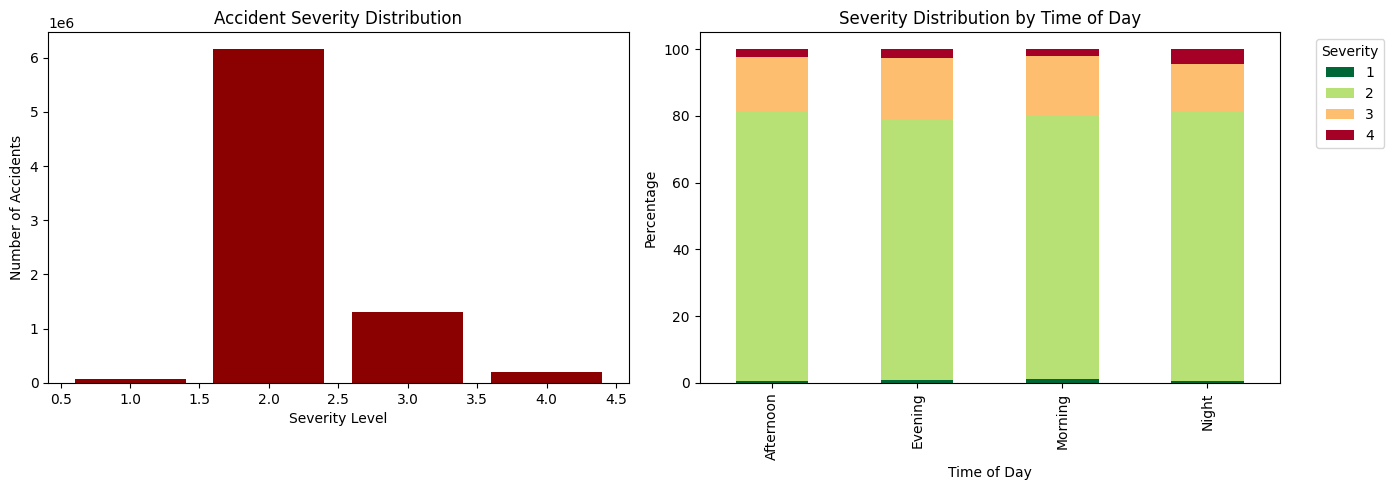

In [26]:
# Severity distribution and patterns
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Severity distribution
severity_counts = df_clean['Severity'].value_counts().sort_index()
axes[0].bar(severity_counts.index, severity_counts.values, color='darkred')
axes[0].set_xlabel('Severity Level')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Accident Severity Distribution')

# Severity by time of day
severity_time = pd.crosstab(df_clean['Time_of_Day'], df_clean['Severity'], normalize='index') * 100
severity_time.plot(kind='bar', stacked=True, ax=axes[1], colormap='RdYlGn_r')
axes[1].set_xlabel('Time of Day')
axes[1].set_ylabel('Percentage')
axes[1].set_title('Severity Distribution by Time of Day')
axes[1].legend(title='Severity', bbox_to_anchor=(1.05, 1))
plt.tight_layout()
plt.show()


Severity 2 is the highest one. Most the critical one wich is 4 are happening during the night.

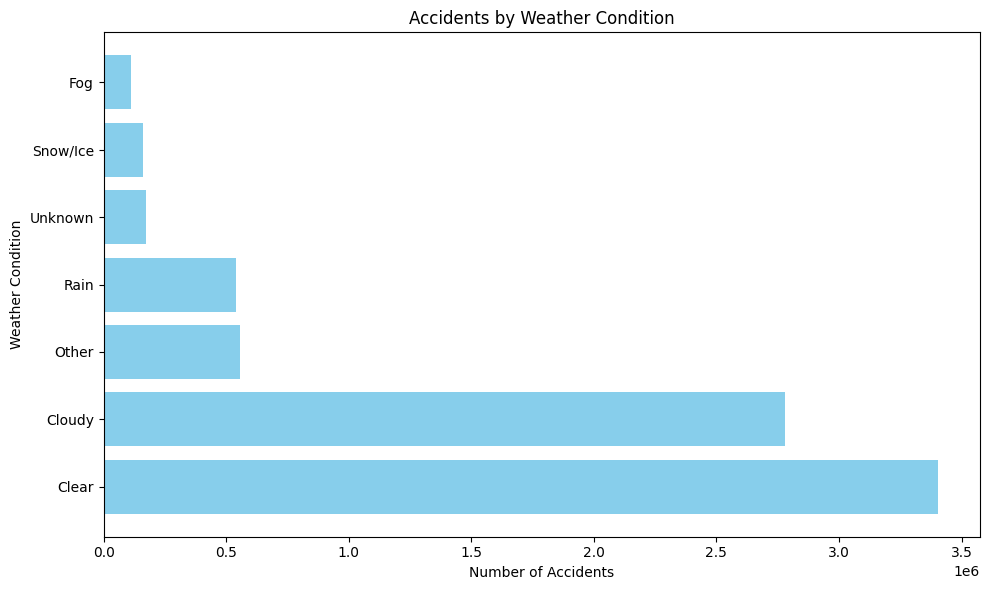

In [27]:
# Weather conditions impact
weather_counts = df_clean['Weather_Category'].value_counts()

plt.figure(figsize=(10, 6))
plt.barh(weather_counts.index, weather_counts.values, color='skyblue')
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.title('Accidents by Weather Condition')
plt.tight_layout()
plt.show()



Clear weather leading on accidents  during weather conditions. Making it that is more Humand error that either get too comfortable when driving if the weather is clear.

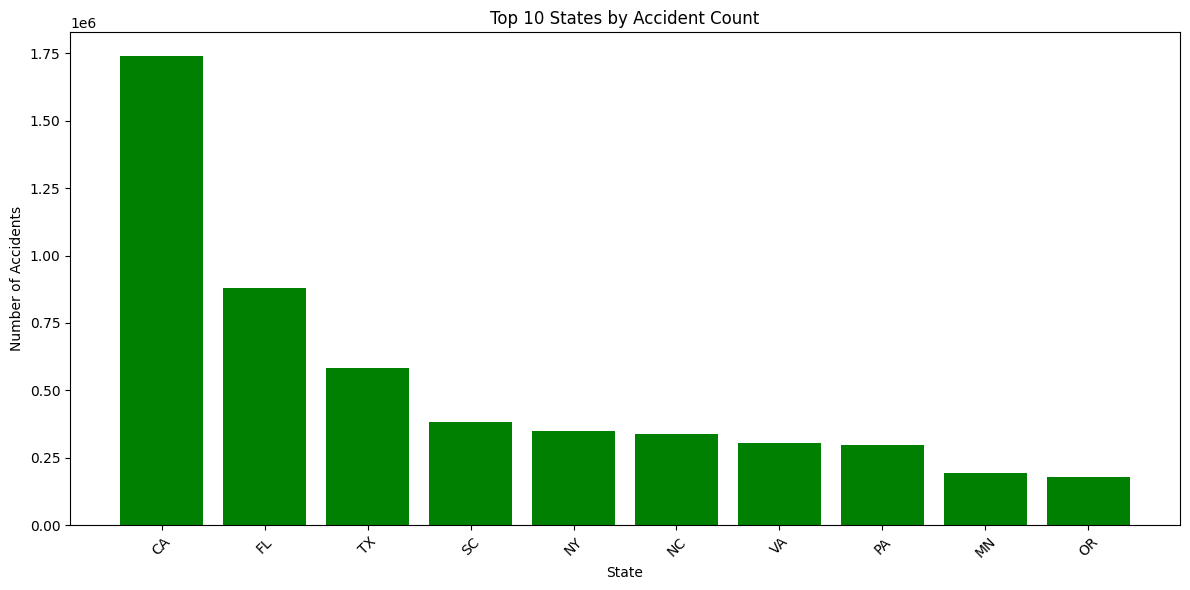

Top 10 states:
State
CA    1741433
FL     880192
TX     582837
SC     382557
NY     347960
NC     338199
VA     303301
PA     296620
MN     192084
OR     179660
Name: count, dtype: int64


In [28]:
# Top 10 states by accident count
top_states = df_clean['State'].value_counts().head(10)

plt.figure(figsize=(12, 6))
plt.bar(top_states.index, top_states.values, color='green')
plt.xlabel('State')
plt.ylabel('Number of Accidents')
plt.title('Top 10 States by Accident Count')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Top 10 states:")
print(top_states)


California been the state with the most accident and second with Florida. I can think that will have to do with the dense population on does states. Also they are the most known for weather/Act of God disaster too.

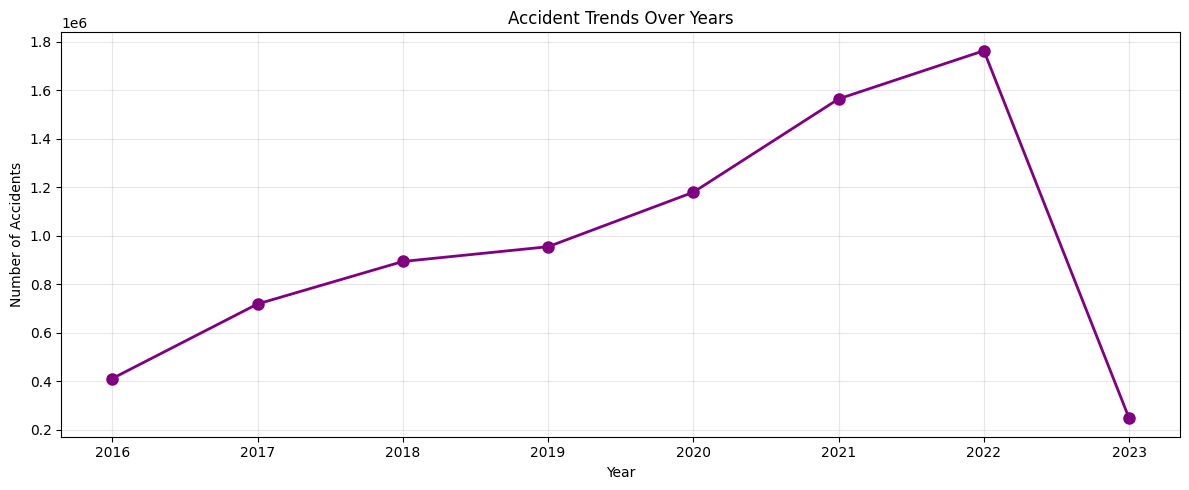

Accidents by year:
Year
2016     410821
2017     718093
2018     893426
2019     954303
2020    1178913
2021    1563753
2022    1762452
2023     246633
dtype: int64


In [29]:
# Yearly trends
yearly = df_clean.groupby('Year').size()

plt.figure(figsize=(12, 5))
plt.plot(yearly.index, yearly.values, marker='o', linewidth=2, markersize=8, color='purple')
plt.xlabel('Year')
plt.ylabel('Number of Accidents')
plt.title('Accident Trends Over Years')
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

print("Accidents by year:")
print(yearly)


Like I said before 2020 the start of Covid probabily made an impact of people driving.

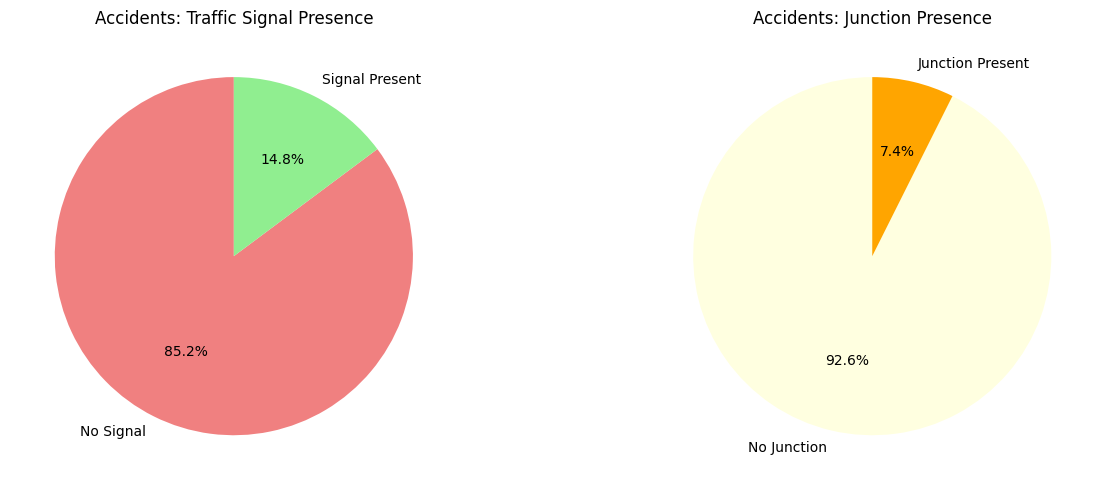

In [30]:
# Traffic signals and junctions impact
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Traffic signal presence
traffic_signal = df_clean['Traffic_Signal'].value_counts()
axes[0].pie(traffic_signal.values, labels=['No Signal', 'Signal Present'], 
            autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightgreen'])
axes[0].set_title('Accidents: Traffic Signal Presence')

# Junction presence
junction = df_clean['Junction'].value_counts()
axes[1].pie(junction.values, labels=['No Junction', 'Junction Present'], 
            autopct='%1.1f%%', startangle=90, colors=['lightyellow', 'orange'])
axes[1].set_title('Accidents: Junction Presence')

plt.tight_layout()
plt.show()


## Evaluation

### Business Insight/Recommendation 1

Based on the analysis, accidents peak during specific hours, particularly during morning and evening rush hours. Morning rush that last from 6 to 9 AM with Evening rush from 2 to 5 PM. Percentage of all accidents: 40.3%. Average severity overall: 2.21


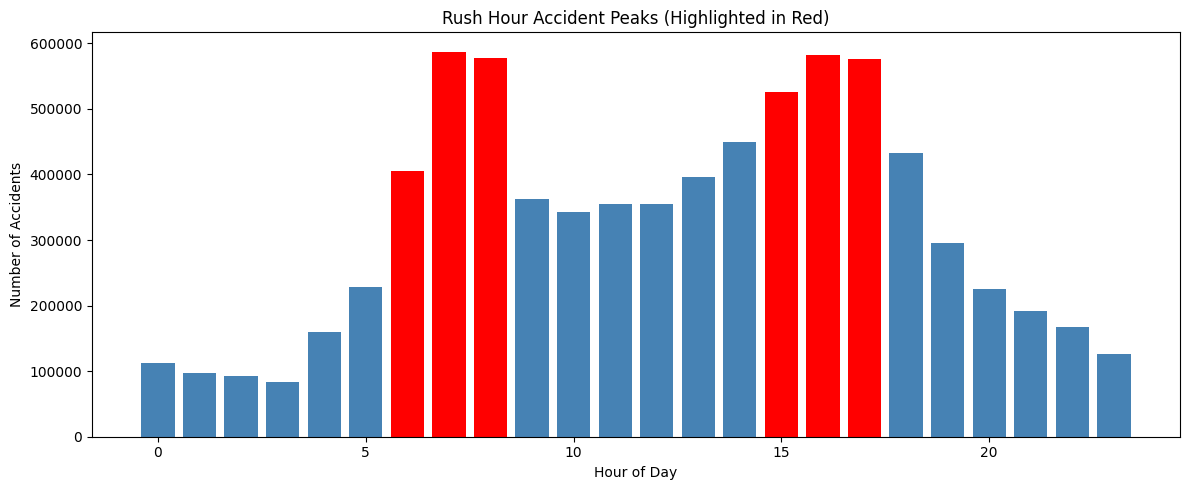

In [31]:
# Insight 1: Rush Hour Analysis
rush_morning = df_clean[df_clean['Hour'].between(7, 9)]
rush_evening = df_clean[df_clean['Hour'].between(16, 18)]
rush_total = len(rush_morning) + len(rush_evening)


# Visualization
fig, ax = plt.subplots(figsize=(12, 5))
hourly = df_clean.groupby('Hour').size()
colors = ['red' if h in [6,7,8,15,16,17] else 'steelblue' for h in hourly.index]
ax.bar(hourly.index, hourly.values, color=colors)
ax.set_xlabel('Hour of Day')
ax.set_ylabel('Number of Accidents')
ax.set_title('Rush Hour Accident Peaks (Highlighted in Red)')
plt.tight_layout()
plt.show()



Recommending that maybe use law enforcement during peak hours to help on the safety of the road. Maybe change the speed limit on the peak hours or add more fast lanes on more traffic areas to decrease the traffic congestion.Probably good idea to have more public transportation maybe add a train that can get around on big traffic areas reducing the people on the road driving.

### Business Insight/Recommendation 2

Weather conditions significantly impact accident rates with clear weather with 3,405,216 accidents and Cloudy with 2,780,884.


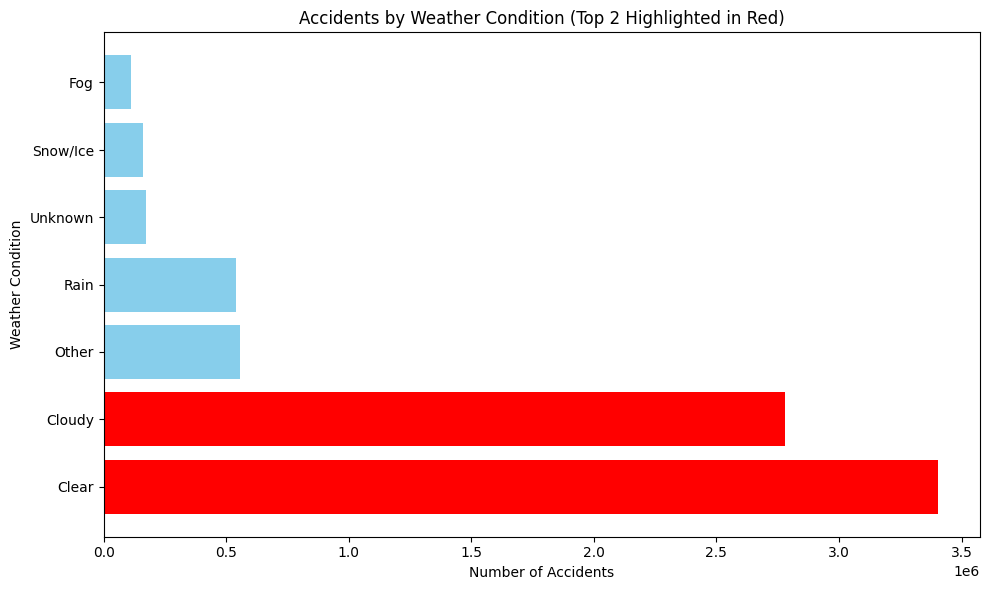

In [32]:

# Visualization - highlight top 2
plt.figure(figsize=(10, 6))
top_2 = weather_counts.head(2).index
colors = ['red' if weather in top_2 else 'skyblue' for weather in weather_counts.index]
plt.barh(weather_counts.index, weather_counts.values, color=colors)
plt.xlabel('Number of Accidents')
plt.ylabel('Weather Condition')
plt.title('Accidents by Weather Condition (Top 2 Highlighted in Red)')
plt.tight_layout()
plt.show()




Recomending to implement weather based speed restriction dependingon the type of weather. Advertisement on what to do on weather coditiones. Requierements for vehicle equipment to have on diffrent weather like for cloudy maybe more light. Have an AI scan your face and alert you if your not looking on the road. I heard Amazon has implements something similars to the drivers.


### Business Insight/Recommendation 3

Accident distribution is highly concentrated in specific states and cities with the Top 5 account for the 50% of total accidents for 3,934,979. Top 5 states having CA with 1,741,433, FL with 880,192, TX with 582,837, SC with 382,557 and NY with 347,960. Top 5 Cities in the US having Miami with 186,917, Houston with 169,609, Los Angeles with 156,49,Charlotte with 138,652 and Dallas with 130,939.



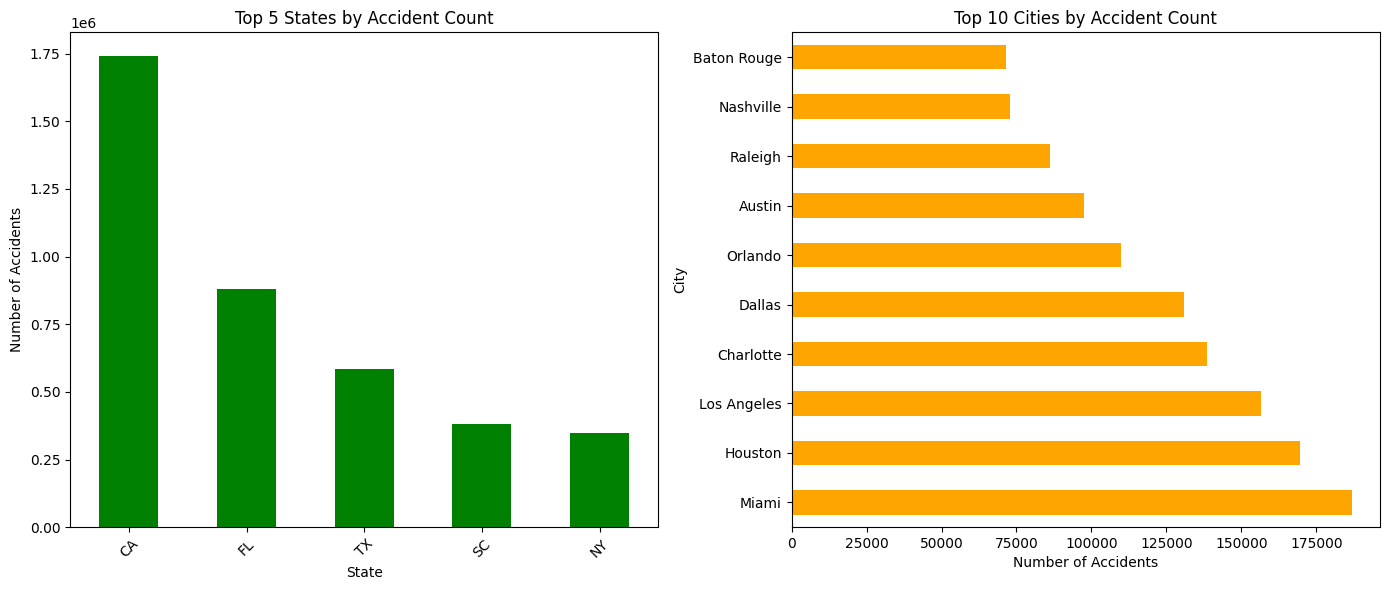

In [33]:
# Insight 3: Geographic Concentration
top_5_states = df_clean['State'].value_counts().head(5)
top_5_cities = df_clean['City'].value_counts().head(10)

# High severity accidents by state
high_severity = df_clean[df_clean['Severity'] >= 3]
high_sev_states = high_severity['State'].value_counts().head(5)

# Visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 6))

top_5_states.plot(kind='bar', ax=axes[0], color='green')
axes[0].set_xlabel('State')
axes[0].set_ylabel('Number of Accidents')
axes[0].set_title('Top 5 States by Accident Count')
axes[0].tick_params(axis='x', rotation=45)

top_5_cities.head(10).plot(kind='barh', ax=axes[1], color='orange')
axes[1].set_xlabel('Number of Accidents')
axes[1].set_title('Top 10 Cities by Accident Count')
plt.tight_layout()
plt.show()



Recomending for the top 5 states top 5 states have more police enforcement on hotspot areas.Possibility for having more options for public transportation like trains to reduce number of vehicles on the road. Conduct safety audits on high accident cities where they can pin point the causes of this.

### Tableau Dashboard link

https://public.tableau.com/views/DOTdashboard/Dashboard1?:language=en-US&publish=yes&:sid=&:redirect=auth&:display_count=n&:origin=viz_share_link

## Conclusion and Next Steps

### Summary of Findings

This analysis of 7 million traffic accidents across the United States has revealed critical patterns that can inform DOT's safety strategies. Through rigorous data analysis, we identified three key areas where targeted interventions can significantly reduce accident rates and improve road safety.

1. Time: Rush hour periods 6-8 AM and 3-5 PM accounts for most accidents, indicating the need for time-specific traffic management strategies.

2. Weather: Adverse weather conditions significantly increase both accident frequency, highlighting the importance of weather-responsive safety protocols.Like it shows even on a good weather theres can still be accidents.

3.Geographic: Accidents are heavily concentrated in specific states with the top ones been on high density states and cities, allowing for efficient allocation of safety resources to high-impact locations.


Recommendations: Provided safety standard or enforce law on rush hours to reduce accident.Minimize weather-related incident with proactive safety measures like Lights, tires and AI. Optimize resource by focusing on hotspots. Improve public safety and reducing the number of vehicles by ads to promote public transportation.

